In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetRegressor

import sys
sys.path.append('../../code')
from functions import *

# Model training and evaluation
## Price prediction

In [20]:
X_train, X_test, y_train, y_test = price_preprocessing()
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train = np.array(X_train, dtype=np.float32)
X_test  = np.array(X_test, dtype=np.float32)
X_validate = np.array(X_validate, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)
y_test  = np.array(y_test, dtype=np.float32).reshape(-1, 1) 
y_validate  = np.array(y_validate, dtype=np.float32).reshape(-1, 1)

In [21]:
tab_regressor = TabNetRegressor()

tab_regressor.fit(X_train, y_train)
y_pred = tab_regressor.predict(X_test)

c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 582840649480.4397|  0:00:04s
epoch 1  | loss: 582453382852.9232|  0:00:09s
epoch 2  | loss: 581824660716.3077|  0:00:14s
epoch 3  | loss: 580722291903.2968|  0:00:19s
epoch 4  | loss: 579369870842.374|  0:00:24s
epoch 5  | loss: 577489785237.0988|  0:00:30s
epoch 6  | loss: 575202902196.0437|  0:00:35s
epoch 7  | loss: 572425441144.967|  0:00:40s
epoch 8  | loss: 569072197722.0221|  0:00:44s
epoch 9  | loss: 565103844565.8026|  0:00:49s
epoch 10 | loss: 559867725576.4395|  0:00:54s
epoch 11 | loss: 554518328691.3408|  0:00:59s
epoch 12 | loss: 549163049770.1978|  0:01:04s
epoch 13 | loss: 543692854913.4066|  0:01:09s
epoch 14 | loss: 537925523793.5824|  0:01:14s
epoch 15 | loss: 531764802391.2088|  0:01:19s
epoch 16 | loss: 525129821802.9011|  0:01:24s
epoch 17 | loss: 517717979631.12085|  0:01:29s
epoch 18 | loss: 510278165470.24176|  0:01:33s
epoch 19 | loss: 502036951175.03296|  0:01:38s
epoch 20 | loss: 493629247713.05493|  0:01:43s
epoch 21 | loss: 485673705562.02

MSE: 22833911808.0
MAE: 112428.8828125
R-squared: 0.61


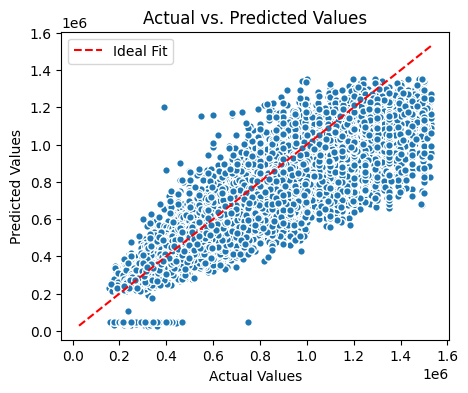

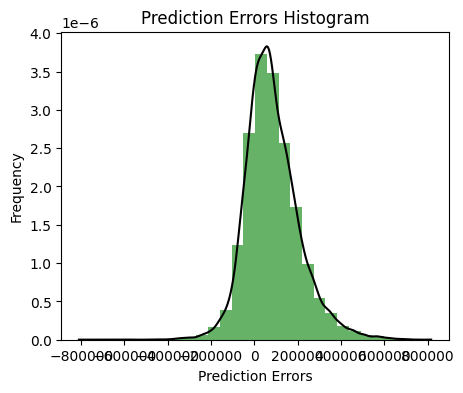

In [22]:
evaluate_model(np.array(y_test).flatten(), np.asarray(y_pred).flatten())

In [ ]:
tab_regressor = TabNetRegressor(
    n_d=64,
    n_a=64,
    n_steps = 5,
    gamma=1.5,
    lambda_sparse=0,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    scheduler_params={"step_size": 10, "gamma": 0.9}
)

tab_regressor.fit(X_train, y_train)
y_pred = tab_regressor.predict(X_test)

c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 581614965681.2307|  0:00:08s
epoch 1  | loss: 573194798136.2635|  0:00:16s
epoch 2  | loss: 556454328387.5166|  0:00:24s
epoch 3  | loss: 534120870923.25275|  0:00:33s
epoch 4  | loss: 509203276766.24176|  0:00:40s
epoch 5  | loss: 480681239698.2857|  0:00:48s
epoch 6  | loss: 448319779311.12085|  0:00:56s
epoch 7  | loss: 414388778535.38464|  0:01:04s
epoch 8  | loss: 378766211859.6924|  0:01:13s
epoch 9  | loss: 344149319589.97797|  0:01:22s
epoch 10 | loss: 311205817782.8572|  0:01:30s
epoch 11 | loss: 280954126876.1319|  0:01:39s
epoch 12 | loss: 248483111542.15384|  0:01:47s
epoch 13 | loss: 216517558632.08792|  0:01:55s
epoch 14 | loss: 186412987403.25275|  0:02:04s
epoch 15 | loss: 161962263788.30768|  0:02:11s
epoch 16 | loss: 139828770703.47253|  0:02:20s
epoch 17 | loss: 118726796794.37363|  0:02:29s
epoch 18 | loss: 98530121435.42854|  0:02:38s
epoch 19 | loss: 80449295506.28572|  0:02:46s
epoch 20 | loss: 67677922675.34068|  0:02:54s
epoch 21 | loss: 556064

MSE: 9611069440.0
MAE: 69263.2578125
R-squared: 0.86


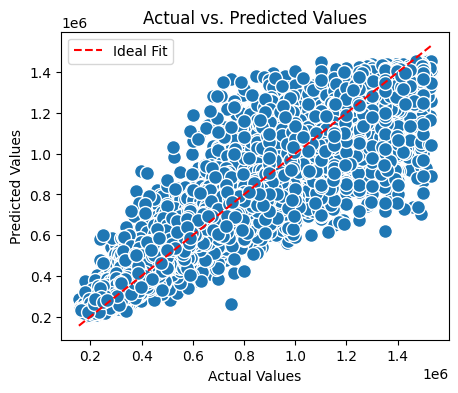

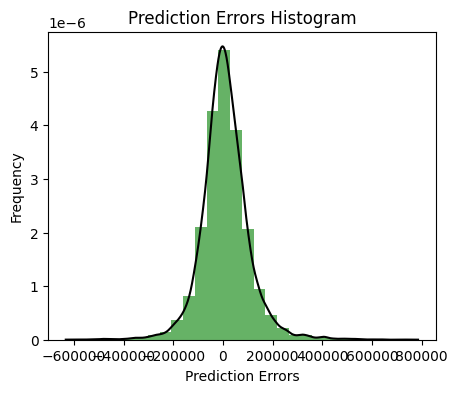

In [ ]:
evaluate_model(np.array(y_test).flatten(), np.asarray(y_pred).flatten())

In [8]:
tab_regressor = TabNetRegressor(
    n_d=64,
    n_a=64,
    n_steps = 6,
    gamma=1.5,
    lambda_sparse=0,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    scheduler_params={
        "step_size": 10, 
        "gamma": 0.9
    }
)

tab_regressor.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_validate, y_validate)],
    max_epochs=150,
    patience=10,
    batch_size=256, 
    virtual_batch_size=256,
    num_workers=6,
    drop_last=False
)

y_pred = tab_regressor.predict(X_test)

c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 561548186004.8059| val_0_mse: 492234833920.0|  0:00:49s
epoch 1  | loss: 452834275691.7103| val_0_mse: 323385819136.0|  0:01:36s
epoch 2  | loss: 315316668633.506| val_0_mse: 224147636224.0|  0:02:27s
epoch 3  | loss: 182508394772.6904| val_0_mse: 153402277888.0|  0:03:19s
epoch 4  | loss: 89562542160.43422| val_0_mse: 41166385152.0|  0:04:07s
epoch 5  | loss: 44542891957.2734| val_0_mse: 24274788352.0|  0:04:57s
epoch 6  | loss: 23796008453.68573| val_0_mse: 18463510528.0|  0:05:46s
epoch 7  | loss: 17511209104.84313| val_0_mse: 25225875456.0|  0:06:35s
epoch 8  | loss: 16043235838.96823| val_0_mse: 16404739072.0|  0:07:24s
epoch 9  | loss: 15414985389.1839| val_0_mse: 18497466368.0|  0:08:11s
epoch 10 | loss: 15372720310.64546| val_0_mse: 19324758016.0|  0:08:58s
epoch 11 | loss: 14414514637.22368| val_0_mse: 18105124864.0|  0:09:45s
epoch 12 | loss: 14067167938.34618| val_0_mse: 19514494976.0|  0:10:33s
epoch 13 | loss: 13606381060.632| val_0_mse: 14572666880.0|  0:

c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


MSE: 8924085248.0
MAE: 64721.51953125
R-squared: 0.88


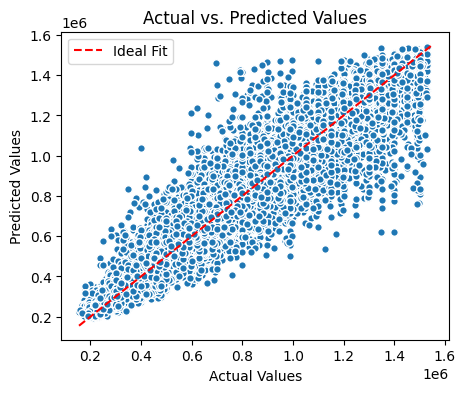

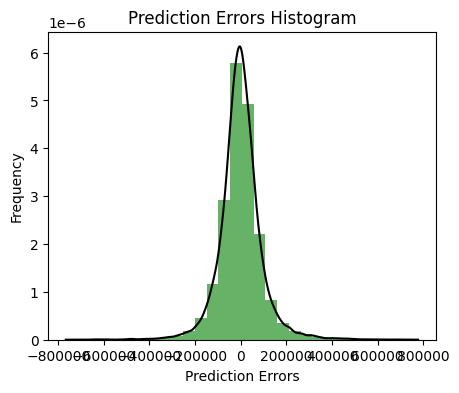

In [9]:
evaluate_model(np.array(y_test).flatten(), np.asarray(y_pred).flatten())

## Rent prediction

In [10]:
X_train, X_test, y_train, y_test = rent_preprocessing()
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train = np.array(X_train, dtype=np.float32)
X_test  = np.array(X_test, dtype=np.float32)
X_validate = np.array(X_validate, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)
y_test  = np.array(y_test, dtype=np.float32).reshape(-1, 1)
y_validate  = np.array(y_validate, dtype=np.float32).reshape(-1, 1)

In [11]:
tab_regressor = TabNetRegressor()

tab_regressor.fit(X_train, y_train)
y_pred = tab_regressor.predict(X_test)


c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x00000226CE3B05E0>
Traceback (most recent call last):
  File "c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^

epoch 0  | loss: 13245167.3|  0:00:02s
epoch 1  | loss: 12867981.76667|  0:00:03s
epoch 2  | loss: 12218045.26667|  0:00:05s
epoch 3  | loss: 11384578.56667|  0:00:06s
epoch 4  | loss: 10360630.03333|  0:00:08s
epoch 5  | loss: 9230017.2|  0:00:09s
epoch 6  | loss: 8090893.11667|  0:00:11s
epoch 7  | loss: 6894737.3|  0:00:12s
epoch 8  | loss: 5673335.43333|  0:00:14s
epoch 9  | loss: 4507672.325|  0:00:15s
epoch 10 | loss: 3457989.4|  0:00:17s
epoch 11 | loss: 2571281.04167|  0:00:18s
epoch 12 | loss: 1825128.975|  0:00:19s
epoch 13 | loss: 1292510.92083|  0:00:21s
epoch 14 | loss: 885176.48958|  0:00:22s
epoch 15 | loss: 669310.46042|  0:00:24s
epoch 16 | loss: 586869.89375|  0:00:25s
epoch 17 | loss: 529456.375|  0:00:27s
epoch 18 | loss: 504151.19375|  0:00:28s
epoch 19 | loss: 499592.33958|  0:00:30s
epoch 20 | loss: 492095.13646|  0:00:31s
epoch 21 | loss: 492519.33021|  0:00:33s
epoch 22 | loss: 487844.26667|  0:00:34s
epoch 23 | loss: 487990.24375|  0:00:36s
epoch 24 | loss: 49

MSE: 410826.09375
MAE: 483.2200012207031
R-squared: 0.7


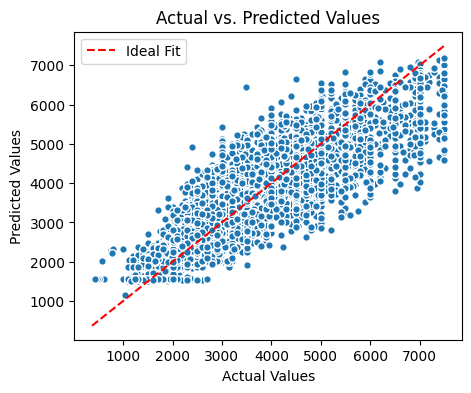

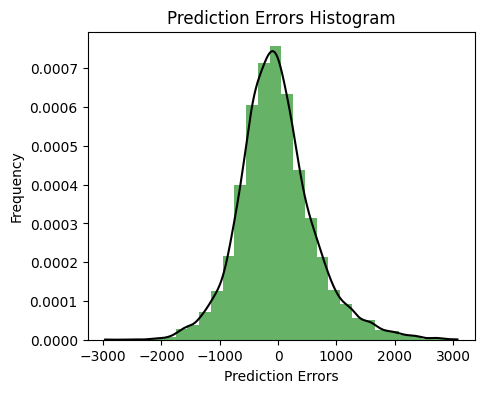

In [12]:
evaluate_model(np.array(y_test).flatten(), np.asarray(y_pred).flatten())

In [13]:
tab_regressor = TabNetRegressor(
    n_d=64,
    n_a=64,
    n_steps = 5,
    gamma=1.5,
    lambda_sparse=0,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    scheduler_params={"step_size": 10, "gamma": 0.9}
)

tab_regressor.fit(X_train, y_train)
y_pred = tab_regressor.predict(X_test)

c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 12720130.6|  0:00:02s
epoch 1  | loss: 9852619.55|  0:00:04s
epoch 2  | loss: 4578604.31667|  0:00:06s
epoch 3  | loss: 970058.09792|  0:00:08s
epoch 4  | loss: 572424.12188|  0:00:11s
epoch 5  | loss: 538137.54062|  0:00:13s
epoch 6  | loss: 526530.66146|  0:00:15s
epoch 7  | loss: 507131.46562|  0:00:17s
epoch 8  | loss: 490516.22812|  0:00:20s
epoch 9  | loss: 478080.34167|  0:00:22s
epoch 10 | loss: 463095.07917|  0:00:24s
epoch 11 | loss: 464949.19792|  0:00:26s
epoch 12 | loss: 448122.34271|  0:00:28s
epoch 13 | loss: 443453.6875|  0:00:30s
epoch 14 | loss: 441108.19062|  0:00:33s
epoch 15 | loss: 432097.54375|  0:00:35s
epoch 16 | loss: 427139.01146|  0:00:37s
epoch 17 | loss: 422848.41771|  0:00:39s
epoch 18 | loss: 418215.50417|  0:00:42s
epoch 19 | loss: 416210.44271|  0:00:44s
epoch 20 | loss: 403552.49896|  0:00:46s
epoch 21 | loss: 397817.20104|  0:00:48s
epoch 22 | loss: 397970.86771|  0:00:51s
epoch 23 | loss: 391598.79583|  0:00:53s
epoch 24 | loss: 386

MSE: 271270.3125
MAE: 352.6499938964844
R-squared: 0.82


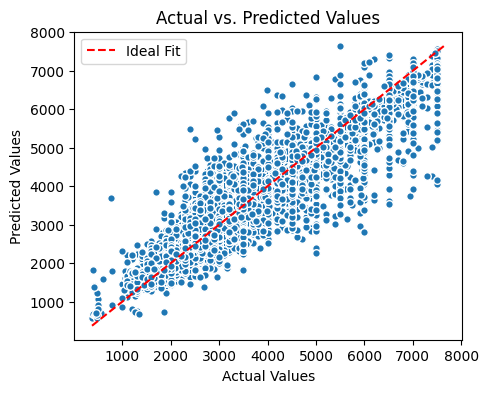

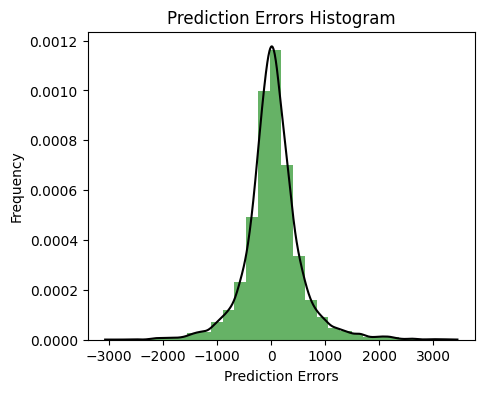

In [14]:
evaluate_model(np.array(y_test).flatten(), np.asarray(y_pred).flatten())

In [16]:
tab_regressor.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_validate, y_validate)],
    max_epochs=150,
    patience=20,
    batch_size=128, 
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False
)

y_pred = tab_regressor.predict(X_test)

epoch 0  | loss: 4095235.20206| val_0_mse: 872477.0|  0:00:18s
epoch 1  | loss: 677949.63788| val_0_mse: 540846.25|  0:00:35s
epoch 2  | loss: 599213.94461| val_0_mse: 515237.84375|  0:00:53s
epoch 3  | loss: 556980.37541| val_0_mse: 512678.875|  0:01:11s
epoch 4  | loss: 535668.98815| val_0_mse: 477526.34375|  0:01:29s
epoch 5  | loss: 528060.50642| val_0_mse: 466331.71875|  0:01:46s
epoch 6  | loss: 519856.098| val_0_mse: 458657.75|  0:02:04s
epoch 7  | loss: 507003.10672| val_0_mse: 473762.625|  0:02:22s
epoch 8  | loss: 505213.12639| val_0_mse: 477965.4375|  0:02:40s
epoch 9  | loss: 504221.42546| val_0_mse: 465820.21875|  0:02:57s
epoch 10 | loss: 499408.89229| val_0_mse: 463526.1875|  0:03:15s
epoch 11 | loss: 496091.27862| val_0_mse: 453660.78125|  0:03:33s
epoch 12 | loss: 505073.76987| val_0_mse: 452223.90625|  0:03:50s
epoch 13 | loss: 483958.19387| val_0_mse: 466432.5625|  0:04:08s
epoch 14 | loss: 480480.59114| val_0_mse: 439832.875|  0:04:26s
epoch 15 | loss: 477748.41116|

c:\Users\mpilc\Desktop\Studia\BIAI\ApartmentPricesPrediction\venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


MSE: 327093.90625
MAE: 419.4599914550781
R-squared: 0.76


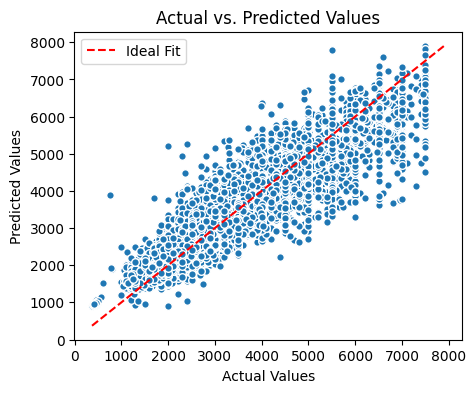

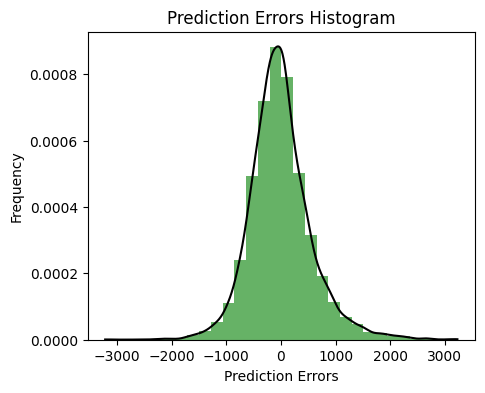

In [17]:
evaluate_model(np.array(y_test).flatten(), np.asarray(y_pred).flatten())